Black-Scholes

In [35]:
import numpy as np
from scipy.stats import norm

def black_scholes(S0, K, T, r, sigma, tipo_opcion='call'):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if tipo_opcion == 'call':
        precio_opcion = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif tipo_opcion == 'put':
        precio_opcion = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    else:
        raise ValueError("Tipo de opcion inválida, debe ser 'call' o 'put'")

    return precio_opcion

# Parametros del activo Parque Arauco obtenidos de la Bolsa de Santiago: https://www.bolsadesantiago.com/resumen_instrumento/PARAUCO
S0 = 1200
K = 1000
T = 1
r = 0.066
sigma = 0.22

# Tipo de opcion (call o put)
tipo_opcion = 'call'

# Precio de la opcion
precio_opcion = black_scholes(S0, K, T, r, sigma, tipo_opcion)
print(f"Precio de la opción {tipo_opcion}: {precio_opcion:.2f}")
print("Para ver la opcion put debe escribir 'put' en la definicion de la variable tipo_opcion en el codigo")
# Parte del codigo de este programa fue obtenido de la siguiente pagina: https://quantpy.com.au/black-scholes-model/calculating-black-scholes-greeks-with-python/

Precio de la opción call: 278.92
Para ver la opcion put debe escribir 'put' en la definicion de la variable tipo_opcion en el codigo


**Segundo Modelo de Valoración (método binomial)**

Explicación:
Este modelo es implementado en tiempo discreto y toma como suposición que el precio del activo subyacente tendrá distintos cambios de precio (subidas y bajadas) a lo largo del tiempo mencionado. Sirve para determinar el precio de una opción en el futuro tanto para si es una opción de compra (call) o de venta (put).

  Este modelo utiliza los mismos parámetros que el modelo de Black-Scholes visto en la respuesta anterior.
  La metodología es mediante un arbol binomial de la siguiente manera:

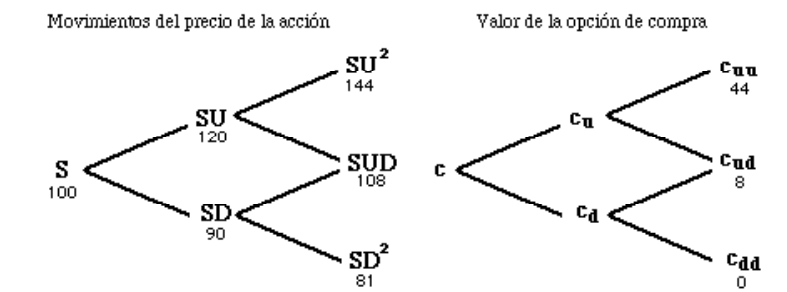

En esta matríz se establecen a travez de determinados periodos de tiempo discreto lo que sucede con el valor del activo subyacente, y se posiciona en cada posible escenario, es decir, si en un principio sube o baja, y por ejemplo si baja, que ocurrirá en el siguiente periodo de tiempo, y así sucesivamente. El valor de la matríz de precios es calculado de la siguiente forma:

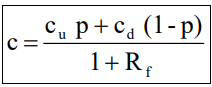

*Ambas imágenes e información sobre el metodo binomial fue obtenida del siguiente artículo: https://www.gacetafinanciera.com/TEORIARIESGO/VALOREOPCIONES.pdf

In [36]:
def binomial_option_pricing(S0, K, T, r, sigma, n, tipo_opcion='call'):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    q = (np.exp(r * dt) - d) / (u - d)



    arbol_precio = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            arbol_precio[i, j] = S0 * (u**i) * (d**(j-i))


    arbol_opcion = np.zeros((n+1, n+1))
    if tipo_opcion == 'call':
        arbol_opcion[:, -1] = np.maximum(arbol_precio[:, -1] - K, 0)
    elif tipo_opcion == 'put':
        arbol_opcion[:, -1] = np.maximum(K - arbol_precio[:, -1], 0)


    for j in range(n-1, -1, -1):
        for i in range(j+1):
            arbol_opcion[i, j] = np.exp(-r * dt) * (q * arbol_opcion[i, j+1] + (1 - q) * arbol_opcion[i+1, j+1])

    return arbol_opcion[0, 0]

# Parametros del activo Parque Arauco obtenidos de la Bolsa de Santiago: https://www.bolsadesantiago.com/resumen_instrumento/PARAUCO
S0 = 1200
K = 1000
T = 1
r = 0.066
sigma = 0.22
n = 1000

# Tipo de opcion (call o put)
tipo_opcion = 'call'

# Precio de la opcion
precio_opcion = binomial_option_pricing(S0, K, T, r, sigma, n, tipo_opcion)
print(f"Precio de la opción {tipo_opcion} con modelo binomial: {precio_opcion:.2f}")
print("Para ver la opcion put debe escribir 'put' en la definicion de la variable tipo_opcion en el codigo")
# Parte del codigo de este programa fue obtenido de la siguiente pagina: https://www.masterfinanciero.es/2019/03/metodo-binomial-de-valoracion-de.html

Precio de la opción call con modelo binomial: 196.91
Para ver la opcion put debe escribir 'put' en la definicion de la variable tipo_opcion en el codigo


**Comparación de ambos modelos (Black-Scholes y Binomial)**

**Diferencias:**


*   El modelo Black-Scholes se trabaja de manera continua, el modelo Binomial trabaja en tiempo discreto.
*   El modelo Binomial requiere mas tiempo de cálculo ya que se requiere armar un arbol de pecios en el cual se deben calcular todos los escenarios posibles dependiendo de la cantidad de periodos de tiempo que se están analizando, el metodo de Black-Scholes es de cálculo más directo.

* El método de Black-Scholes se limita a trabajar con parámetros fijos, y no se pueden aplicar cambios a los valores de estos. En cambio el modelo Binomial si permite que existan variaciones en los valores de sus parámetros, ya que al ir analizando lo que sucede en cada uno de los periodos de tiempo, es posible hacer estos analisis con los cambios que podrían haber habido entre un periodo y otro.
*   El modelo de Black-Scholes trabaja con una fórmula y el modelo Binomial, como se mencionó antes, trabaja mediante un árbol de opciones y de precios.





**Similitudes:**


*   Ambos modelos son aceptados para una correcta evaluación y predicción de los precios de las opciones.
*   Ambos modelos funcionan bajo los mismos parámetros.



**Ingesta de datos**

In [27]:
!pip install bolsa-stgo

In [28]:
import os
from bolsa.consultas import ConsultasAPI # Cliente de la API Servicios de Consulta

# cargar la api key desde las variables de entorno del sistma
# api_key = os.environ['API_BS']
api_key = '7219C2E64EE1463AB55A209773F5C9D0'

# Creación de la instancia que manipulara las solicitudes a la API
con_bs = ConsultasAPI(token=api_key)

In [29]:
import numpy as np

# Solicitar los nombres de instrumentos disponibles
resp = con_bs.get_instrumentos_validos()
# seleccionar alguno al azar
# ticker = con_bs.get_instrumentos_validos()[np.random.randint(len(resp))]['NEMO']

In [30]:
con_bs.get_instrumentos_validos()

[{'NEMO': 'ANDINA-A'},
 {'NEMO': 'CCU'},
 {'NEMO': 'CENCOSHOPP'},
 {'NEMO': 'EMBONOR-B'},
 {'NEMO': 'HITES'},
 {'NEMO': 'LAS CONDES'},
 {'NEMO': 'MASISA'},
 {'NEMO': 'MOLLER'},
 {'NEMO': 'ORO BLANCO'},
 {'NEMO': 'VAPORES'}]

In [32]:
# solicitar el resumen del instrumento.
con_bs.get_resumen_accion(Nemo='CCU')

{'Estado': '0',
 'Glosa': 'Su acción fue completada',
 'Hora': '2023102717260384',
 'Nemo': 'CCU',
 'Cantidad_Acumulada': 0,
 'Monto_Acumulado_Hoy': 0,
 'Monto_Acumulado_Ayer': 1899092356,
 'Monto_Acumulado_Mensual': 23676769327,
 'Monto_Acumulado_Anual': 238305739085,
 'Precio_Cierre_Hoy': 5350,
 'Precio_Cierre_Ayer': 5350,
 'Precio_Mayor_Hoy': 0,
 'Precio_Mayor_Ayer': 5359.9,
 'Precio_Mayor_Mensual': 5849.1,
 'Precio_Mayor_Anual': 7390.4,
 'Precio_Medio_Hoy': 0,
 'Precio_Medio_Ayer': 5317.97,
 'Precio_Medio_Mensual': 5380.53,
 'Precio_Medio_Anual': 6176.55,
 'Precio_Menor_Hoy': 0,
 'Precio_Menor_Ayer': 5090.1,
 'Precio_Menor_Mensual': 5065,
 'Precio_Menor_Anual': 5065,
 'Tendencia_Hoy': 'N',
 'Variacion_Hoy': 0,
 'Variacion_Ayer': 3.48,
 'Rentab_Mensual': -5.27,
 'Rentab_Mensual_Anterior': -10.37,
 'Rentab_Anual': -5.18,
 'Rentab_Anual_Anterior': -13.29,
 'Precio_Utilidad': 16.68,
 'Utilidad_Precio': 6,
 'Bolsa_Libro': 1.51,
 'Libro_Ajustado': 3550.22,
 'Peso_IPSA': 0,
 'Presencia': 